# Libraries

In [16]:
from pyzotero import zotero
import os
import tweepy as tw
import pandas as pd
import datetime
import json, sys
from datetime import date, timedelta  
import datetime
import plotly.express as px
import pycountry
import re
import pandas as pd
import matplotlib.pyplot as plt

# Zotero library credentials

In [4]:
library_id = '2514686'
library_type = 'group'
api_key = '' # api_key is only needed for private groups and libraries
zot = zotero.Zotero(library_id, library_type)

# Retrieving data

In [5]:
items = zot.everything(zot.top())

data=[]
columns=['Title','Publication type', 'Link to publication', 'Abstract', 'Zotero link', 'Date added', 'Date published', 'Authors', 'Publisher', 'Journal', 'Col_key']

for item in items:
    creators = item['data']['creators']
    creators_str = ", ".join([creator.get('firstName', '') + ' ' + creator.get('lastName', '') for creator in creators])
    data.append((
        item['data']['title'], 
        item['data']['itemType'], 
        item['data']['url'], 
        item['data']['abstractNote'], 
        item['links']['alternate']['href'],
        item['data']['dateAdded'],
        item['data'].get('date'),
        creators_str,
        item['data'].get('publisher'),
        item['data'].get('publicationTitle'),
        item['data']['collections'],
        )) 

df = pd.DataFrame(data, columns=columns)

mapping_types = {
    'thesis': 'Thesis',
    'journalArticle': 'Journal article',
    'book': 'Book',
    'bookSection': 'Book chapter',
    'blogPost': 'Blog post',
    'videoRecording': 'Video',
    'podcast': 'Podcast',
    'magazineArticle': 'Magazine article',
    'webpage': 'Webpage',
    'newspaperArticle': 'Newspaper article',
    'report': 'Report',
    'forumPost': 'Forum post',
    'manuscript': 'Manuscript',
    'document': 'Document',
    'conferencePaper': 'Conference paper',
    'film': 'Film',
    'presentation': 'Presentation'
}
df['Publication type'] = df['Publication type'].replace(mapping_types)

mapping_publisher = {
    'Taylor & Francis Group': 'Taylor and Francis',
    'Taylor and Francis': 'Taylor and Francis',
    'Taylor & Francis': 'Taylor and Francis',
    'Routledge': 'Routledge',
    'Routledge Handbooks Online': 'Routledge',
    'Praeger Security International': 'Praeger',
    'Praeger': 'Praeger'
}
df['Publisher'] = df['Publisher'].replace(mapping_publisher)

# df['Publisher'] = df['Publisher'].replace(['Taylor & Francis Group', 'Taylor and Francis', 'Taylor & Francis'], 'Taylor and Francis')
# df['Publisher'] = df['Publisher'].replace(['Routledge', 'Routledge Handbooks Online'], 'Routledge')
# df['Publisher'] = df['Publisher'].replace(['Praeger Security International', 'Praeger'], 'Praeger')

mapping_journal = {
    'International Journal of Intelligence and Counterintelligence': 'Intl Journal of Intelligence and Counterintelligence',
    'International Journal of Intelligence and CounterIntelligence': 'Intl Journal of Intelligence and Counterintelligence',
    'Intelligence and national security': 'Intelligence and National Security',
    'Intelligence and National Security': 'Intelligence and National Security',
    'Intelligence & National Security': 'Intelligence and National Security'
}

df['Journal'] = df['Journal'].replace(mapping_journal)

# df['Journal'] = df['Journal'].replace(['International Journal of Intelligence and Counterintelligence', 'International Journal of Intelligence and CounterIntelligence'], 'Intl Journal of Intelligence and Counterintelligence')
# df['Journal'] = df['Journal'].replace(['Intelligence and national security', 'Intelligence and National Security', 'Intelligence & National Security'], 'Intelligence and National Security')

In [20]:
df1 = df.copy()

In [6]:
df['Author'] = df['Authors'].str.split(', ')
df = df.explode('Author', ignore_index=True)
df['Col_key'] = df['Col_key'].astype(str).str.strip('[]').str.split(', ')
df = df.explode('Col_key', ignore_index=True)
df['Col_key'] = df['Col_key'].astype(str).str.strip("'")
df

,Title,Publication type,Link to publication,Abstract,Zotero link,Date added,Date published,Authors,Publisher,Journal,Col_key,Author
0,How Could Israeli Intelligence Miss the Hamas ...,Blog post,https://www.csis.org/analysis/how-could-israel...,"Hamas pulled off a complex, multifront assault...",https://www.zotero.org/groups/intelligence_bib...,2023-10-30T21:27:03Z,2023-10-11,Emily Harding,None,None,9YPHGMBS,Emily Harding
1,The pressures and pitfalls of attributing blam...,Newspaper article,https://www.ft.com/content/0d2b4ebc-aedc-44d6-...,,https://www.zotero.org/groups/intelligence_bib...,2023-10-27T10:24:29Z,2023-10-26,Suzanne Raine,None,Financial Times,CZJ36V8L,Suzanne Raine
2,Intelligence warning in the corporate sector: ...,Journal article,https://doi.org/10.1080/18335330.2023.2274614,"The 2013 terrorist attack at the In Amenas, Al...",https://www.zotero.org/groups/intelligence_bib...,2023-10-27T10:24:01Z,2023-10-26,Michael J. Ard,None,"Journal of Policing, Intelligence and Counter ...",TLFN4NAL,Michael J. Ard
3,The moment Canada learned about the Cuban Miss...,Blog post,https://timsayle.substack.com/p/the-moment-can...,And: Just what is an “intelligence officer”?,https://www.zotero.org/groups/intelligence_bib...,2023-10-24T09:34:59Z,2023-10-21,Tim Sayle,None,None,CZT6L9T7,Tim Sayle
4,Examining the Ethics of Spying: A Practitioner...,Journal article,https://doi.org/10.1007/s11572-023-09704-5,This paper examines from the point of view of ...,https://www.zotero.org/groups/intelligence_bib...,2023-10-24T07:39:55Z,2023-10-20,David Omand,None,Criminal Law and Philosophy,DVEM4H4W,David Omand
...,...,...,...,...,...,...,...,...,...,...,...,...
4482,Silent Warfare: Understanding the World of Int...,Book,,,https://www.zotero.org/groups/intelligence_bib...,2020-06-05T10:17:21Z,2002,"Abram N. Shulsky, Gary Schmitt",Potomac Books,None,HCN8YFI8,Gary Schmitt
4483,Silent Warfare: Understanding the World of Int...,Book,,,https://www.zotero.org/groups/intelligence_bib...,2020-06-05T10:17:21Z,2002,"Abram N. Shulsky, Gary Schmitt",Potomac Books,None,DVEM4H4W,Gary Schmitt
4484,Intelligence and Government in Britain and the...,Book,,,https://www.zotero.org/groups/intelligence_bib...,2020-06-05T10:17:21Z,2012,Philip H.J. Davies,Praeger,None,HCN8YFI8,Philip H.J. Davies
4485,Intelligence and Government in Britain and the...,Book,,,https://www.zotero.org/groups/intelligence_bib...,2020-06-05T10:17:21Z,2012,Philip H.J. Davies,Praeger,None,DVEM4H4W,Philip H.J. Davies


In [7]:
def zotero_collections(library_id, library_type):
    collections = zot.collections()
    data = [(item['data']['key'], item['data']['name'], item['meta']['numItems'], item['links']['alternate']['href']) for item in collections]
    df_collections = pd.DataFrame(data, columns=['Col_key', 'Collection_name', 'NumberOfItems', 'Collection_link'])
    return df_collections
df_collections = zotero_collections(library_id, library_type)

In [8]:
df = pd.merge(df, df_collections, on='Col_key', how='left')
df

,Title,Publication type,Link to publication,Abstract,Zotero link,Date added,Date published,Authors,Publisher,Journal,Col_key,Author,Collection_name,NumberOfItems,Collection_link
0,How Could Israeli Intelligence Miss the Hamas ...,Blog post,https://www.csis.org/analysis/how-could-israel...,"Hamas pulled off a complex, multifront assault...",https://www.zotero.org/groups/intelligence_bib...,2023-10-30T21:27:03Z,2023-10-11,Emily Harding,None,None,9YPHGMBS,Emily Harding,"05.1 Intelligence, warning, and surprise attack",40.0,https://www.zotero.org/groups/intelligence_bib...
1,The pressures and pitfalls of attributing blam...,Newspaper article,https://www.ft.com/content/0d2b4ebc-aedc-44d6-...,,https://www.zotero.org/groups/intelligence_bib...,2023-10-27T10:24:29Z,2023-10-26,Suzanne Raine,None,Financial Times,CZJ36V8L,Suzanne Raine,03 Intelligence analysis,113.0,https://www.zotero.org/groups/intelligence_bib...
2,Intelligence warning in the corporate sector: ...,Journal article,https://doi.org/10.1080/18335330.2023.2274614,"The 2013 terrorist attack at the In Amenas, Al...",https://www.zotero.org/groups/intelligence_bib...,2023-10-27T10:24:01Z,2023-10-26,Michael J. Ard,None,"Journal of Policing, Intelligence and Counter ...",TLFN4NAL,Michael J. Ard,"01.9 Terrorism, insurgency, and counterinsurgency",85.0,https://www.zotero.org/groups/intelligence_bib...
3,The moment Canada learned about the Cuban Miss...,Blog post,https://timsayle.substack.com/p/the-moment-can...,And: Just what is an “intelligence officer”?,https://www.zotero.org/groups/intelligence_bib...,2023-10-24T09:34:59Z,2023-10-21,Tim Sayle,None,None,CZT6L9T7,Tim Sayle,01.7 Cold War,244.0,https://www.zotero.org/groups/intelligence_bib...
4,Examining the Ethics of Spying: A Practitioner...,Journal article,https://doi.org/10.1007/s11572-023-09704-5,This paper examines from the point of view of ...,https://www.zotero.org/groups/intelligence_bib...,2023-10-24T07:39:55Z,2023-10-20,David Omand,None,Criminal Law and Philosophy,DVEM4H4W,David Omand,"06 Intelligence oversight, and ethics",117.0,https://www.zotero.org/groups/intelligence_bib...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,Silent Warfare: Understanding the World of Int...,Book,,,https://www.zotero.org/groups/intelligence_bib...,2020-06-05T10:17:21Z,2002,"Abram N. Shulsky, Gary Schmitt",Potomac Books,None,HCN8YFI8,Gary Schmitt,02 Intelligence studies,153.0,https://www.zotero.org/groups/intelligence_bib...
4483,Silent Warfare: Understanding the World of Int...,Book,,,https://www.zotero.org/groups/intelligence_bib...,2020-06-05T10:17:21Z,2002,"Abram N. Shulsky, Gary Schmitt",Potomac Books,None,DVEM4H4W,Gary Schmitt,"06 Intelligence oversight, and ethics",117.0,https://www.zotero.org/groups/intelligence_bib...
4484,Intelligence and Government in Britain and the...,Book,,,https://www.zotero.org/groups/intelligence_bib...,2020-06-05T10:17:21Z,2012,Philip H.J. Davies,Praeger,None,HCN8YFI8,Philip H.J. Davies,02 Intelligence studies,153.0,https://www.zotero.org/groups/intelligence_bib...
4485,Intelligence and Government in Britain and the...,Book,,,https://www.zotero.org/groups/intelligence_bib...,2020-06-05T10:17:21Z,2012,Philip H.J. Davies,Praeger,None,DVEM4H4W,Philip H.J. Davies,"06 Intelligence oversight, and ethics",117.0,https://www.zotero.org/groups/intelligence_bib...


In [9]:
df['NumberOfItems'] = df['NumberOfItems'].fillna(0).astype(int)
df['NumberOfItems'] = df['NumberOfItems'].astype(int)
df

,Title,Publication type,Link to publication,Abstract,Zotero link,Date added,Date published,Authors,Publisher,Journal,Col_key,Author,Collection_name,NumberOfItems,Collection_link
0,How Could Israeli Intelligence Miss the Hamas ...,Blog post,https://www.csis.org/analysis/how-could-israel...,"Hamas pulled off a complex, multifront assault...",https://www.zotero.org/groups/intelligence_bib...,2023-10-30T21:27:03Z,2023-10-11,Emily Harding,None,None,9YPHGMBS,Emily Harding,"05.1 Intelligence, warning, and surprise attack",40,https://www.zotero.org/groups/intelligence_bib...
1,The pressures and pitfalls of attributing blam...,Newspaper article,https://www.ft.com/content/0d2b4ebc-aedc-44d6-...,,https://www.zotero.org/groups/intelligence_bib...,2023-10-27T10:24:29Z,2023-10-26,Suzanne Raine,None,Financial Times,CZJ36V8L,Suzanne Raine,03 Intelligence analysis,113,https://www.zotero.org/groups/intelligence_bib...
2,Intelligence warning in the corporate sector: ...,Journal article,https://doi.org/10.1080/18335330.2023.2274614,"The 2013 terrorist attack at the In Amenas, Al...",https://www.zotero.org/groups/intelligence_bib...,2023-10-27T10:24:01Z,2023-10-26,Michael J. Ard,None,"Journal of Policing, Intelligence and Counter ...",TLFN4NAL,Michael J. Ard,"01.9 Terrorism, insurgency, and counterinsurgency",85,https://www.zotero.org/groups/intelligence_bib...
3,The moment Canada learned about the Cuban Miss...,Blog post,https://timsayle.substack.com/p/the-moment-can...,And: Just what is an “intelligence officer”?,https://www.zotero.org/groups/intelligence_bib...,2023-10-24T09:34:59Z,2023-10-21,Tim Sayle,None,None,CZT6L9T7,Tim Sayle,01.7 Cold War,244,https://www.zotero.org/groups/intelligence_bib...
4,Examining the Ethics of Spying: A Practitioner...,Journal article,https://doi.org/10.1007/s11572-023-09704-5,This paper examines from the point of view of ...,https://www.zotero.org/groups/intelligence_bib...,2023-10-24T07:39:55Z,2023-10-20,David Omand,None,Criminal Law and Philosophy,DVEM4H4W,David Omand,"06 Intelligence oversight, and ethics",117,https://www.zotero.org/groups/intelligence_bib...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,Silent Warfare: Understanding the World of Int...,Book,,,https://www.zotero.org/groups/intelligence_bib...,2020-06-05T10:17:21Z,2002,"Abram N. Shulsky, Gary Schmitt",Potomac Books,None,HCN8YFI8,Gary Schmitt,02 Intelligence studies,153,https://www.zotero.org/groups/intelligence_bib...
4483,Silent Warfare: Understanding the World of Int...,Book,,,https://www.zotero.org/groups/intelligence_bib...,2020-06-05T10:17:21Z,2002,"Abram N. Shulsky, Gary Schmitt",Potomac Books,None,DVEM4H4W,Gary Schmitt,"06 Intelligence oversight, and ethics",117,https://www.zotero.org/groups/intelligence_bib...
4484,Intelligence and Government in Britain and the...,Book,,,https://www.zotero.org/groups/intelligence_bib...,2020-06-05T10:17:21Z,2012,Philip H.J. Davies,Praeger,None,HCN8YFI8,Philip H.J. Davies,02 Intelligence studies,153,https://www.zotero.org/groups/intelligence_bib...
4485,Intelligence and Government in Britain and the...,Book,,,https://www.zotero.org/groups/intelligence_bib...,2020-06-05T10:17:21Z,2012,Philip H.J. Davies,Praeger,None,DVEM4H4W,Philip H.J. Davies,"06 Intelligence oversight, and ethics",117,https://www.zotero.org/groups/intelligence_bib...


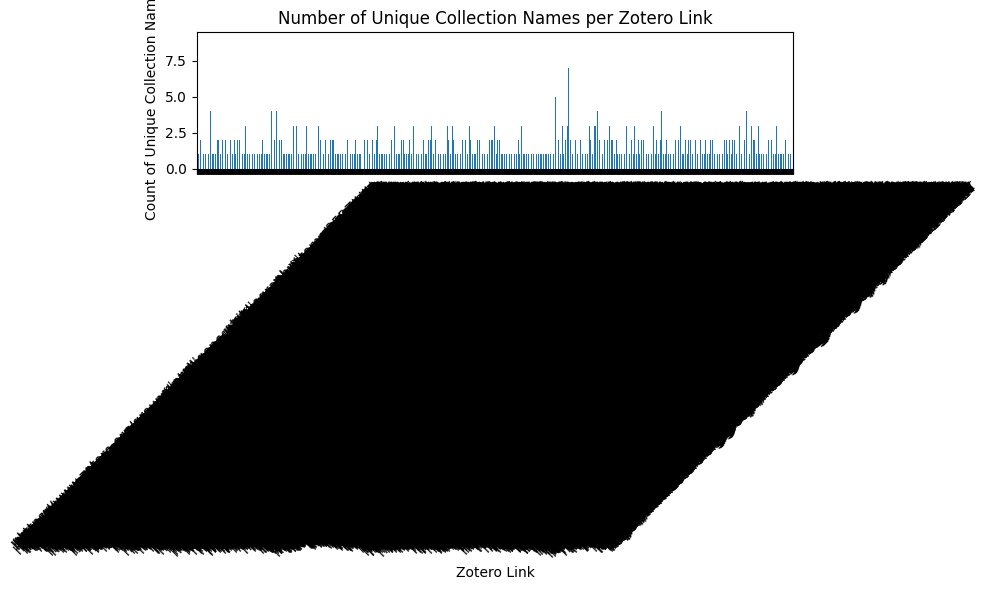

In [17]:
grouped = df.groupby('Zotero link')['Collection_name'].nunique()
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar')
plt.title('Number of Unique Collection Names per Zotero Link')
plt.xlabel('Zotero Link')
plt.ylabel('Count of Unique Collection Names')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
df_collections = df_collections.sort_values(by='Collection_name')
df_collections=df_collections[df_collections['Collection_name'].str.contains("01.")]
df_collections = df_collections.iloc[1: , :]
df_collections

,Col_key,Collection_name,NumberOfItems,Collection_link
43,DS3WDJUS,01.1 Pre-Napoleonic Wars,26,https://www.zotero.org/groups/intelligence_bib...
29,8XA7D88D,01.2 Napoleonic Wars,10,https://www.zotero.org/groups/intelligence_bib...
42,9DTPTK46,01.3 1800-1914,73,https://www.zotero.org/groups/intelligence_bib...
41,BNPYHVD4,01.4 WW1 (First Wold War),104,https://www.zotero.org/groups/intelligence_bib...
40,MP7FJ9UA,01.5 Inter-war period,74,https://www.zotero.org/groups/intelligence_bib...
39,SCCGXHMZ,01.6 WW2 (Second World War),204,https://www.zotero.org/groups/intelligence_bib...
38,CZT6L9T7,01.7 Cold War,244,https://www.zotero.org/groups/intelligence_bib...
24,DHLN8GE4,01.7.1 Arab-Israeli Conflict,22,https://www.zotero.org/groups/intelligence_bib...
7,9I86L884,01.7.2 Falklands War,4,https://www.zotero.org/groups/intelligence_bib...
10,6XBG92FJ,01.7.3 Suez Crisis,4,https://www.zotero.org/groups/intelligence_bib...
